## Workflow: https://cocreate.csail.mit.edu/r/vEwbyFS8B3BhK3k3F

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daybikedataset/day.csv
/kaggle/input/hourbikedataset/hour.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# file = open("/kaggle/input/daybikedataset/day.csv", "rb")
# file = open("/kaggle/input/d/vedika27agarwal/daybikedataset/day.csv", "rb")
file = open("/kaggle/input/hourbikedataset/hour.csv", "rb")
# file = open("/kaggle/input/d/vedika27agarwal/hourbikedataset/hour.csv", "rb")

data_r = file.readlines()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# data_arr = np.genfromtxt('/kaggle/input/daybikedataset/day.csv', delimiter=',', dtype=np.float64, skip_header=1)
# data_arr = np.genfromtxt('/kaggle/input/d/vedika27agarwal/daybikedataset/day.csv', delimiter=',', dtype=np.float64, skip_header=1)

data_arr = np.genfromtxt('/kaggle/input/hourbikedataset/hour.csv', delimiter=',', dtype=np.float64, skip_header=1)
# data_arr = np.genfromtxt('/kaggle/input/d/vedika27agarwal/hourbikedataset/hour.csv', delimiter=',', dtype=np.float64, skip_header=1)

data_arr = np.hstack((data_arr[:, 11:13]*100, data_arr[:, 16:17]))

In [4]:
print(data_arr.shape)

(17379, 3)


In [5]:
print(data_arr)

[[28.79 81.   16.  ]
 [27.27 80.   40.  ]
 [27.27 80.   32.  ]
 ...
 [25.76 60.   90.  ]
 [27.27 56.   61.  ]
 [27.27 65.   49.  ]]


In [6]:
data_arr = data_arr.astype(int)
print(data_arr)

[[28 81 16]
 [27 80 40]
 [27 80 32]
 ...
 [25 60 90]
 [27 56 61]
 [27 65 49]]


In [7]:
from mpl_toolkits.mplot3d import Axes3D
import random
import math

random_seed = 6
data_freq = 15000
# data = data_arr[:data_freq, :]
random.seed(random_seed)
indices = random.sample(range(data_arr.shape[0]), data_freq)

data = data_arr[indices, :]

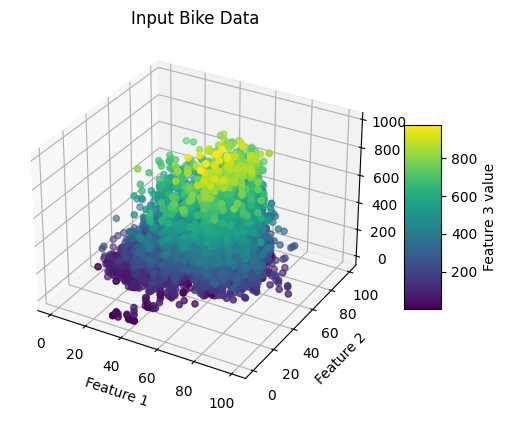

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = data[:, 0]
Y = data[:, 1]
Z = data[:, 2]

scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis')

color_bar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('Feature 3 value')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Input Bike Data')

plt.show()

In [9]:
class Vector:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def dot_product(self, vector):
        return (self.a*vector.a + self.b*vector.b + self.c*vector.c)
    
    def cross_product(self, vector):
        a = self.b*vector.c - self.c*vector.b
        b = self.c*vector.a - self.a*vector.c
        c = self.a*vector.b - self.b*vector.a
        return Vector(a, b, c)
    
    def magnitude(self):
        return np.sqrt(self.a**2 + self.b**2 + self.c**2)
    
    def unit_vector(self):
        magnitude = self.magnitude()
        return Vector(round(self.a / magnitude, 4), round(self.b / magnitude, 4), round(self.c / magnitude, 4))
    
    def __eq__(self, other):
        return (isinstance(other, Vector) and
               math.fabs(self.a - other.a) < 0.0001 and
               math.fabs(self.b - other.b) < 0.0001 and
               math.fabs(self.c - other.c) < 0.0001)
    
    def __hash__(self):
        return hash((self.a, self.b, self.c))
    
    def __str__(self):
        return "Vector " + str(self.a) + "i + " + str(self.b) + "j + " + str(self.c) + "k"

In [10]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.closest_plane = None
    
    def set_closest_plane(self, plane):
        self.closest_plane = plane
    
    def __eq__(self, other):
        return (isinstance(other, Point) and
               math.fabs(self.x - other.x) < 0.0001 and
               math.fabs(self.y - other.y) < 0.0001 and
               math.fabs(self.z - other.z) < 0.0001)
    
    def __hash__(self):
        return hash((self.x, self.y, self.z))
    
    def __str__(self):
        return "Point (" + str(self.x) + ", " + str(self.y) + ", " + str(self.z) + ")"

In [11]:
class Line:
    def __init__(self, pt1, pt2):
        if pt1 != pt2:
            self.dir_cosine = Vector(pt1.x - pt2.x, pt1.y - pt2.y, pt1.z - pt2.z).unit_vector()
        else:
            self.dir_cosine = Vector(1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3))
        
        if self.dir_cosine.a:
            lamda = - round(pt1.x / self.dir_cosine.a, 4)
            x = 0
            y = lamda * self.dir_cosine.b + pt1.y
            z = lamda * self.dir_cosine.c + pt1.z
            self.pt = Point(x, y, z)
        
        else:
            if self.dir_cosine.b:
                lamda = - round(pt1.y / self.dir_cosine.b, 4)
                y = 0
                z = lamda * self.dir_cosine.c + pt1.z
                self.pt = Point(pt1.x, y, z)
            
            else:
                if self.dir_cosine.c:
                    self.pt = Point(pt1.x, pt2.y, 0)
                
                else:
                    self.pt = pt1
                    self.dir_cosine = Vector(1, 0, 0)
    
    def distance_from_pt(self, point):
        line_vector = Vector(point.x - self.pt.x, point.y - self.pt.y, point.z - self.pt.z)
        numerator = line_vector.cross_product(self.dir_cosine).magnitude()
        denominator = self.dir_cosine.magnitude()
        return round(numerator / denominator, 4)
    
    def __eq__(self, other):
        return (isinstance(other, Line) and
               self.dir_cosine == other.dir_cosine and
               self.pt == other.pt)
    
    def __hash__(self):
        return hash((self.dir_cosine, self.pt))
    
    def __str__(self):
        return "Line: " + str(self.pt)[6:] + " + L*(" + str(self.dir_cosine)[7:] + ")"

In [12]:
def find_min_dist(pt, F):
    F = list(F)
    min_dist = F[0].distance_from_pt(pt)
    for line in F[1:]:
        cur_dist = line.distance_from_pt(pt)
        min_dist = min(min_dist, cur_dist)
    
    return min_dist

In [13]:
import heapq

def Approx_k_j_Flats(P, C, k, j=1):
    
    t = 1
    Q = P
    F = set()
    F_len_mid = None
    
    while Q.shape[0] >= (C*k*(j+1)):
        S_len = 1
        
        indx_S0 = random.sample(range(Q.shape[0]), S_len)
        indx_S1 = random.sample(range(Q.shape[0]), S_len)
        
        F_ = set()
        for i in range(S_len):
            for l in range(S_len):
                pt1 = Q[indx_S0[i]]
                pt1 = Point(pt1[0], pt1[1], pt1[2])
                pt2 = Q[indx_S1[l]]
                pt2 = Point(pt2[0], pt2[1], pt2[2])
                F_.add(Line(pt1, pt2))
        
        F.update(F_)
        
        min_dist_rec = [] # Contains lists [dist, indx] as elements where dist = min distance of point Q[indx] from closest line
        Q_index = 0
        for pt in Q:
            pt = Point(pt[0], pt[1], pt[2])
            min_dist_rec.append((-1*find_min_dist(pt, F_), Q_index))
            Q_index += 1
        
        heapq.heapify(min_dist_rec)
        
        Q_ = []
        for i in range(Q.shape[0]//2):
            Q_.append(Q[heapq.heappop(min_dist_rec)[1]])
        
        Q = np.array(Q_)
        t += 1
    
    F_len_mid = len(F)
    
    for point1 in Q:
        for point2 in Q:
            pt1 = Point(point1[0], point1[1], point1[2])
            pt2 = Point(point2[0], point2[1], point2[2])
            F.add(Line(pt1, pt2))
    
    return Q, F.copy(), F_len_mid

In [14]:
C, k = 1, 3
Q, F, F_len_mid = Approx_k_j_Flats(data, C=C, k=k)
print(len(F), F_len_mid)

21 12


In [15]:
def plotLine(line):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = [line.pt.x, line.pt.x + -150*line.dir_cosine.a,  line.pt.x + 300*line.dir_cosine.a]
    y = [line.pt.y, line.pt.y + -150*line.dir_cosine.b,  line.pt.y + 300*line.dir_cosine.b]
    z = [line.pt.z, line.pt.z + -150*line.dir_cosine.c,  line.pt.z + 300*line.dir_cosine.c]
    
    X = data[:, 0]
    Y = data[:, 1]
    Z = data[:, 2]

    ax.scatter(x, y, z, color='red', marker='o')
    
    scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='.')
    
    ax.plot(x, y, z, label='3D line')

#     color_bar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
#     color_bar.set_label('Feature 3 value')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Line')

    plt.show()

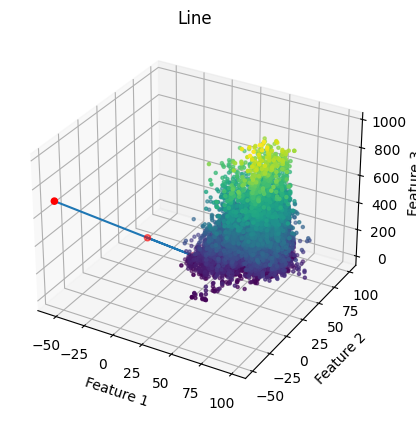

In [16]:
plotLine(list(F)[4])

In [17]:
print(list(F)[4])

Line: (0, -11.424755099999999, 410.598695) + L*(-0.1834i + -0.1255j + 0.975k)


In [18]:
class Plane:
    def __init__(self, line):
        self.pt = line.pt
        self.normal = line.dir_cosine
        
        # Normal Vector: ai + bj + ck, Point on Plane: (x0, y0, z0)
        # Equation of Plane: a*x0 + b*y0 + c*z0 = d
        self.d = round(self.pt.x*self.normal.a + self.pt.y*self.normal.b + self.pt.z*self.normal.c, 4)
        
        self.pts_on_plane = {}
        self.projected_pts = set()
    
    def getRotationMatrix(self):
        # First Rotation: rotation around x-axis, normal now in xz-plane
        # Second Rotation: rotation around y-axis, normal now parallel to z-axis, plane parallel to xy-plane
        # R: Rotation Matrix after the two rotations
        
        normal = self.normal
        cos_al = normal.c / np.sqrt(normal.b**2 + normal.c**2)
        sin_al = normal.b / np.sqrt(normal.b**2 + normal.c**2)

        rotated_normal = np.array([normal.a, 0, normal.b*sin_al + normal.c*cos_al])

        cos_be = rotated_normal[2] / np.sqrt(rotated_normal[0]**2 + rotated_normal[2]**2)
        sin_be = -rotated_normal[0] / np.sqrt(rotated_normal[0]**2 + rotated_normal[2]**2)

        R = np.array([[cos_be, sin_al*sin_be, cos_al*sin_be], [0, cos_al, -sin_al], [-sin_be, sin_al*cos_be, cos_al*cos_be]])
        return R
    
    def projectEpsilonNet(self, centers):
        # Projects centers of epsilon-net generated in R2 on the plane
        # centers: centers of epsilon-net generated in R2
        
        R = self.getRotationMatrix()
        transformed_pt = np.dot(R, np.array([self.pt.x, self.pt.y, self.pt.z]).T)
        
        new_column = np.full((centers.shape[0], 1), transformed_pt[2])
        centers = np.hstack((centers, new_column))
        
        # Computing position of centers on original plane by dot product with R-inverse
        projected_centers = np.dot(R.T, centers.T).T
        
        return projected_centers
    
    def createPlaneUsing2Vectors(self, pt):
        # Creates plane that contains normal, and line parallel to normal passing through one of the centers of epsilon-net
        # pt: one of the centers from the epsilon-net
        
        temp_vector = Vector(pt.x - self.pt.x, pt.y - self.pt.y, pt.z - self.pt.z)
        new_normal_dir = temp_vector.cross_product(self.normal)
        
        pt2 = Point(pt.x + new_normal_dir.a, pt.y + new_normal_dir.b, pt.z + new_normal_dir.c)
        return Plane(Line(pt, pt2))
    
    def add_pt(self, pt, dist):
        projected_coordinates = pt - [dist*self.normal.a, dist*self.normal.b, dist*self.normal.c]
        projected_pt = Point(projected_coordinates[0], projected_coordinates[1], projected_coordinates[2])
        pt = Point(pt[0], pt[1], pt[2])
        self.pts_on_plane[pt] = projected_pt
        self.projected_pts.add(projected_pt)
    
    def __eq__(self, other):
        return (isinstance(other, Plane) and
               self.normal == other.normal and
               self.d == other.d)
    
    def __hash__(self):
        return hash((self.normal, self.pt))
    
    def __str__(self):
        return "Plane: " + str(self.normal.a) + "x + " + str(self.normal.b) + "y + " + str(self.normal.c) + "z = " + str(self.d)

### Creating Epsilon-Net on a Region in *R2*

In [19]:
def createEpsilonNet2D(E):
    no_of_centers = int(1/E**2) * int(-np.log2(E))
    
    mean = 0
    std_dev = 10
    
    x_values, y_values = [], []
    cur_no = 0
    while cur_no < no_of_centers:
        x_value = np.random.normal(mean, std_dev, 1)
        if x_value[0] >= 1:
            continue
        
        iter = 0
        flag = False
        while iter < 100:
            y_value = np.random.normal(mean, std_dev, 1)
            if x_value[0]**2 + y_value[0]**2 <= 1:
                x_values.append(round(x_value[0], 2))
                y_values.append(round(y_value[0], 2))
                cur_no += 1
                break
            iter += 1
    
    print("E =", E)
    print("No. of centers =", len(x_values))
    print("Standard Deviation =", std_dev)
#     print(x_values, y_values)
    
    return x_values, y_values

In [20]:
def createEpsilonNet2D_2(E):
    no_of_centers = int(1/E**2) * int(-np.log2(E)) // 4
    
    mean = 0
    std_dev = 50
    
    x_values, y_values = [], []
    cur_no = 0
    while cur_no < no_of_centers:
        x_value = np.random.normal(mean, std_dev, 1)
        if x_value[0] >= 1:
            continue
        if x_value[0] < 0:
            x_value[0] *= -1
        
        iter = 0
        flag = False
        while iter < 100:
            y_value = np.random.normal(mean, std_dev, 1)
                
            if x_value[0]**2 + y_value[0]**2 <= 1:
                if y_value[0] < 0:
                    y_value[0] *= -1
                x_values.append(round(x_value[0], 2))
                y_values.append(round(y_value[0], 2))
                cur_no += 1
                break
            iter += 1
    
    for i in range(no_of_centers):
        x_values.extend([x_values[i], -x_values[i], -x_values[i]])
        y_values.extend([-y_values[i], y_values[i], -y_values[i]])
        
    print("E =", E)
    print("No. of centers =", len(x_values))
    print("Standard Deviation =", std_dev)
#     print(x_values, y_values)
    
    return x_values, y_values

In [21]:
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# E = 0.25
# no_of_centers = int(1/E**2) * int(-np.log2(E))

# X, Y = createEpsilonNet2D(E)

# centers = list(zip(X, Y))
# # radii = [1] + [E]*no_of_centers

# fig, ax = plt.subplots()

# ax.add_patch(patches.Circle((0, 0), 1, edgecolor='blue', facecolor='none'))

# radius = E
# for center in centers:
#     circle = patches.Circle(center, radius, edgecolor='orange', facecolor='none')
#     ax.add_patch(circle)

# plt.plot(X, Y, linestyle = " ", marker = '.')
# plt.xlim(-1.75, 1.75)
# plt.ylim(-1.3, 1.3)
# plt.show()

In [22]:
def gridEpsilonNet(E):
    # Selects set of points (centers) from unit sphere (say S),
    #     for x belonging to S, there exists y belonging to centers such that
    #         ||x-y|| <= E,    where ||.|| -> l2 norm of .
    
    # Creates epsilon-net in R2 which completely covers circle of unit radius centered at Origin
    #     using smaller circles of radius E
    # E: Radius of smaller circles of epsilon-net
    
    centers = set()
    Ert3, Ert3_2 = round(E*np.sqrt(3), 2), round(E*np.sqrt(3)/2, 2)
    cur_center = (0, 0)
    flag = False
    exit_flag = False
    
    while True:
        if cur_center[0]**2 + cur_center[1]**2 > 1:
            exit_flag = True
        
        if not exit_flag:
            centers.add(cur_center)
            cur_center = (cur_center[0], cur_center[1]+Ert3)
        
        while True:
            if cur_center[0]**2 + cur_center[1]**2 <= 1:
                centers.add(cur_center)
            elif (cur_center[0]-E/2)**2 + (cur_center[1]-Ert3_2)**2 < 1:
                centers.add(cur_center)
            elif (cur_center[0]-E)**2 + (cur_center[1])**2 < 1:
                centers.add(cur_center)
            else:
                break
            cur_center = (cur_center[0], cur_center[1]+Ert3)
            
        
        if exit_flag:
            break
        
        if flag:
            cur_center = (cur_center[0] + 3*E/2, 0)
            flag = False
        else:
            cur_center = (cur_center[0] + 3*E/2, Ert3_2)
            flag = True
    
    centers = list(centers)
    for i in range(len(centers)):
        centers.extend([(-centers[i][0], centers[i][1]), (-centers[i][0], -centers[i][1]), (centers[i][0], -centers[i][1])])
    
    return list(set(centers))

In [23]:
E = 0.25
centers = gridEpsilonNet(E)

# centers = centers.tolist()
slopes = set()
unique_centers = []

for center in centers:
    if center == [0, 0]:
        unique_centers.append(center)
        continue
    
    if center[0] == 0:
        cur_slope = float('inf')
    else:
        cur_slope = center[1] / center[0]
    
    if cur_slope not in slopes:
        slopes.add(cur_slope)
        unique_centers.append(center)
    else:
        continue

unique_centers = np.array(unique_centers)

E = 0.25
No. of Centers = 31


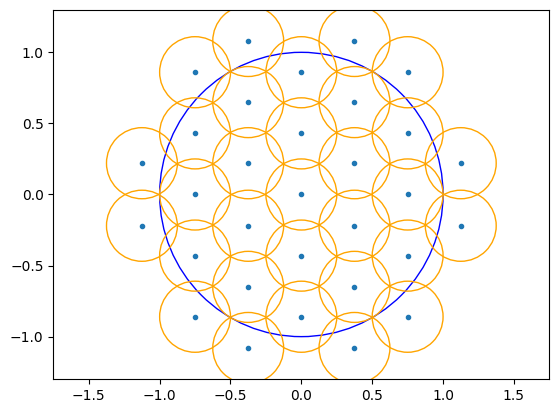

In [24]:
fig, ax = plt.subplots()

ax.add_patch(patches.Circle((0, 0), 1, edgecolor='blue', facecolor='none'))

radius = E
for center in centers:
    circle = patches.Circle(center, radius, edgecolor='orange', facecolor='none')
    ax.add_patch(circle)

print("E =", E)
print("No. of Centers =", len(centers))
centers = np.array(centers)
plt.plot(centers[:, 0], centers[:, 1], linestyle = " ", marker = '.')
plt.xlim(-1.75, 1.75)
plt.ylim(-1.3, 1.3)
plt.show()

In [25]:
print(centers)

[[ 0.375  1.08 ]
 [ 0.375 -0.65 ]
 [-0.375  1.08 ]
 [-0.375 -0.65 ]
 [-0.75  -0.86 ]
 [ 1.125 -0.22 ]
 [ 0.75  -0.86 ]
 [ 0.    -0.86 ]
 [-0.75   0.86 ]
 [ 0.375  0.65 ]
 [ 0.375 -1.08 ]
 [-0.375  0.65 ]
 [-0.375 -1.08 ]
 [ 0.75   0.86 ]
 [ 0.     0.86 ]
 [-1.125  0.22 ]
 [-0.75   0.43 ]
 [ 0.75   0.43 ]
 [ 0.375  0.22 ]
 [-0.375  0.22 ]
 [ 0.     0.43 ]
 [-0.75   0.   ]
 [ 0.75   0.   ]
 [ 0.     0.   ]
 [-1.125 -0.22 ]
 [ 0.375 -0.22 ]
 [ 1.125  0.22 ]
 [-0.75  -0.43 ]
 [-0.375 -0.22 ]
 [ 0.75  -0.43 ]
 [ 0.    -0.43 ]]


In [26]:
print(len(unique_centers))
print(unique_centers)

14
[[ 0.375  1.08 ]
 [ 0.375 -0.65 ]
 [-0.375  1.08 ]
 [-0.375 -0.65 ]
 [-0.75  -0.86 ]
 [ 1.125 -0.22 ]
 [ 0.75  -0.86 ]
 [ 0.    -0.86 ]
 [-0.75   0.43 ]
 [ 0.75   0.43 ]
 [ 0.375  0.22 ]
 [-0.375  0.22 ]
 [-0.75   0.   ]
 [-1.125 -0.22 ]]


In [27]:
unique_centers = np.array(unique_centers)
cur_plane = Plane(list(F)[2])
projected_centers = cur_plane.projectEpsilonNet(unique_centers)

In [28]:
for center in projected_centers[:5, :]:
    print(center)
    print(cur_plane.normal.a*center[0] + cur_plane.normal.b*center[1] + cur_plane.normal.c*center[2] - cur_plane.d, end = "\n\n")

[55.97284299 56.27723899 54.74988834]
-2.218110800811246e-05

[55.97284299 55.05394426 55.97318307]
-2.218110800811246e-05

[55.36047056 56.58342521 55.05607456]
-2.2181108022323315e-05

[55.36047056 55.36013047 56.27936929]
-2.218110800811246e-05

[55.05428434 55.36473116 56.58095482]
-2.218110800811246e-05



In [29]:
G = set()
for center in projected_centers:
    G.add(cur_plane.createPlaneUsing2Vectors(Point(center[0] ,center[1], center[2])))

In [30]:
G = set()
for f in F:
    cur_plane = Plane(f)
    projected_centers = cur_plane.projectEpsilonNet(unique_centers)
    for center in projected_centers:
        G.add(cur_plane.createPlaneUsing2Vectors(Point(center[0] ,center[1], center[2])))

In [31]:
# For C = 1, k = 3, j = 1
print("For C =", C, "k =", k, "j = 1")
print(F_len_mid, len(F))

For C = 1 k = 3 j = 1
12 21


In [32]:
print(len(G))

294


In [33]:
import math

P = set()
for pt in data:
    closest_plane = None
    min_dist = float('inf')
    
    for plane in G:
        cur_dist = np.dot(pt - [plane.pt.x, plane.pt.y, plane.pt.z], [plane.normal.a, plane.normal.b, plane.normal.c])
        if math.fabs(min_dist) > math.fabs(cur_dist):
            min_dist = cur_dist
            closest_plane = plane
    
    closest_plane.add_pt(pt, min_dist)
    pt = Point(pt[0], pt[1], pt[2])
    P.add(pt)
    pt.set_closest_plane(closest_plane)

In [34]:
print(list(list(G)[0].pts_on_plane.items())[0][0], list(list(G)[0].pts_on_plane.items())[0][1])

Point (40, 71, 299) Point (40.154143267947866, 71.00758772695458, 298.9764405761842)


In [35]:
test_pt = list(P)[0]
print(test_pt)
test_plane = list(P)[0].closest_plane
print(test_plane)
proj_test_pt = list(P)[0].closest_plane.pts_on_plane[list(P)[0]]
print(proj_test_pt)

print(test_plane.normal.a*proj_test_pt.x + test_plane.normal.b*proj_test_pt.y + test_plane.normal.c*proj_test_pt.z - test_plane.d)

Point (48, 77, 33)
Plane: 0.4439x + 0.8642y + -0.2369z = 79.6873
Point (47.84660033873984, 76.70135618999544, 33.081866140465266)
2.3821084454311858e-05


In [36]:
print(data[0])

[ 51 100  45]


In [37]:
G_ = G.copy()
for plane in G_:
    if not plane.pts_on_plane:
        G.remove(plane)

In [38]:
print(len(G_), len(G))

294 174
